Converting time 0


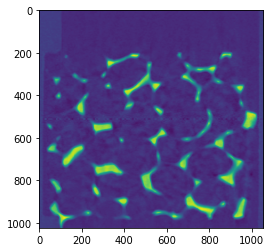

In [41]:
"""
mkdir -p /usr/sci/cedmav/data/materials_science.idx/foam
cd /usr/sci/cedmav/data/materials_science.idx/foam
python3 convert.py
"""

import numpy as np
import matplotlib.pyplot as plt

def Check(cond):
    if not cond:  raise Exception("interal error")

# filename depth,height,width
timesteps=[
    ("/usr/sci/cedmav/data/materials_science/foam/0.00mm/000mm.raw",   1024, 1024, 1055),
    ("/usr/sci/cedmav/data/materials_science/foam/0.25mm/025mm.raw",   1024, 1024, 1027),
    ("/usr/sci/cedmav/data/materials_science/foam/0.50mm/050mm.raw",   1024, 1024, 1000),
    ("/usr/sci/cedmav/data/materials_science/foam/0.75mm/075mm.raw",   1024, 1024,  980),
    ("/usr/sci/cedmav/data/materials_science/foam/1.00mm/100mm.raw",   1024, 1024,  965),
    ("/usr/sci/cedmav/data/materials_science/foam/1.25mm/125mm.raw",   1024, 1024,  943),
    ("/usr/sci/cedmav/data/materials_science/foam/1.50mm/150mm.raw",   1024, 1024,  927),
    ("/usr/sci/cedmav/data/materials_science/foam/1.75mm/175mm.raw",   1024, 1024,  907),
    ("/usr/sci/cedmav/data/materials_science/foam/2.00mm/200mm.raw",   1024, 1024,  890),
    ("/usr/sci/cedmav/data/materials_science/foam/2.25mm/225mm.raw",   1024, 1024,  868),
    ("/usr/sci/cedmav/data/materials_science/foam/2.50mm/250mm.raw",   1024, 1024,  849),
    ("/usr/sci/cedmav/data/materials_science/foam/2.75mm/275mm.raw",   1024, 1024,  826),
    ("/usr/sci/cedmav/data/materials_science/foam/3.00mm/300mm.raw",   1024, 1024,  813),
    ("/usr/sci/cedmav/data/materials_science/foam/3.25mm/325mm.raw",   1024, 1024,  789),
    ("/usr/sci/cedmav/data/materials_science/foam/3.50mm/350mm.raw",   1024, 1024,  770),
    ("/usr/sci/cedmav/data/materials_science/foam/3.75mm/375mm.raw",   1024, 1024,  750),
    ("/usr/sci/cedmav/data/materials_science/foam/4.00mm/400mm.raw",   1024, 1024,  726),
    ("/usr/sci/cedmav/data/materials_science/foam/4.25mm/425mm.raw",   1024, 1024,  711),
    ("/usr/sci/cedmav/data/materials_science/foam/4.50mm/450mm.raw",   1024, 1024,  690),
]  

sys.path.append(r"C:\projects\OpenVisus\build\RelWithDebInfo")
from OpenVisus import *

W=max([it[3] for it in timesteps])
H=max([it[2] for it in timesteps])
D=max([it[1] for it in timesteps])
T=len(timesteps)

db=CreateIdx(url="visus.idx", dims=(W,H,D), fields=[Field("data","uint16","row_major")], time=(0,T-1,"time%02d/") )

for t in range(T):
    print("Converting time",t)
    filename,depth,height,width=timesteps[t]
    data=np.fromfile(filename, dtype=np.uint16, count=- 1, sep='', offset=0)
    Check(data.shape[0]==width*height*depth)
    data3d=data.reshape((depth,height,width))
    db.write(data,logic_box=[(0,0,0),(width,height,depth)],time=t)
    plt.imshow(data3d[int(depth/2),:,])  

    # comment this line if you want to do the conversion
    break